In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools
import numpy as np
from matplotlib import colors
import glob 
from mocsy import mocsy
import gsw
import pandas as pd

In [2]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
tmask = tmask.rename({'z' : 'deptht'})
area = meshmask.e1t[0] * meshmask.e2t[0]

In [3]:
cm_salt = copy.copy(cm.haline)
cm_salt.set_bad('grey')
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')
cm_temp = copy.copy(cm.thermal)
cm_temp.set_bad('grey')
cm_vel = copy.copy(cm.curl)
cm_vel.set_bad('grey')

In [4]:
chem_alkalinity_run_may_01 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/alkalinity/01may21/SalishSea_1h_20210501_20210501_chem_T.nc')
chem_alkalinity_run_may_03 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/alkalinity/03may21/SalishSea_1h_20210503_20210503_chem_T.nc')
chem_alkalinity_run_may_06 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/alkalinity/06may21/SalishSea_1h_20210506_20210506_chem_T.nc')
chem_alkalinity_run_may_16 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/alkalinity/16may21/SalishSea_1h_20210516_20210516_chem_T.nc')
chem_alkalinity_run_may_31 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/alkalinity/31may21/SalishSea_1h_20210531_20210531_chem_T.nc')
chem_alkalinity_run_may_01

<xarray.Dataset>
Dimensions:                     (y: 898, x: 398, nvertex: 4, deptht: 40,
                                 axis_nbounds: 2, time_counter: 24)
Coordinates:
    nav_lat                     (y, x) float32 ...
    nav_lon                     (y, x) float32 ...
  * deptht                      (deptht) float32 0.5 1.5 2.5 ... 414.5 441.5
    time_centered               (time_counter) datetime64[ns] ...
  * time_counter                (time_counter) datetime64[ns] 2021-05-01T00:3...
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon              (y, x, nvertex) float32 ...
    bounds_nav_lat              (y, x, nvertex) float32 ...
    area                        (y, x) float32 ...
    deptht_bounds               (deptht, axis_nbounds) float32 ...
    time_centered_bounds        (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds         (time_counter, axis_nbounds) datetime64[ns] ...
    PAR                         (time_counter, deptht, y, x) float32 ...
    turbidity                   (time_counter, deptht, y, x) float32 ...
    dissolved_inorganic_carbon  (time_counter, deptht, y, x) float32 ...
    total_alkalinity            (time_counter, deptht, y, x) float32 ...
    dissolved_oxygen            (time_counter, deptht, y, x) float32 ...
    CO2_flux                    (time_counter, y, x) float32 ...
Attributes:
    name:         SalishSea_1h_20210501_20210531_chem_T
    description:  chemistry and light
    title:        chemistry and light
    Conventions:  CF-1.6
    timeStamp:    2023-Dec-03 21:11:48 GMT
    uuid:         73af0f2a-dbdf-4d83-9a75-ba23e1d34336

In [5]:
phy_alkalinity_run_may_01 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/alkalinity/01may21/SalishSea_1h_20210501_20210501_grid_T.nc')
phy_alkalinity_run_may_03 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/alkalinity/03may21/SalishSea_1h_20210503_20210503_grid_T.nc')
phy_alkalinity_run_may_06 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/alkalinity/06may21/SalishSea_1h_20210506_20210506_grid_T.nc')
phy_alkalinity_run_may_16 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/alkalinity/16may21/SalishSea_1h_20210516_20210516_grid_T.nc')
phy_alkalinity_run_may_31 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/alkalinity/31may21/SalishSea_1h_20210531_20210531_grid_T.nc')
phy_alkalinity_run_may_01

<xarray.Dataset>
Dimensions:               (y: 898, x: 398, nvertex: 4, deptht: 40,
                           axis_nbounds: 2, time_counter: 24)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * deptht                (deptht) float32 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 2021-05-01T00:30:00 ....
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon        (y, x, nvertex) float32 ...
    bounds_nav_lat        (y, x, nvertex) float32 ...
    area                  (y, x) float32 ...
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    sossheig              (time_counter, y, x) float32 ...
    votemper              (time_counter, deptht, y, x) float32 ...
    vosaline              (time_counter, deptht, y, x) float32 ...
    sigma_theta           (time_counter, deptht, y, x) float32 ...
    e3t                   (time_counter, deptht, y, x) float32 ...
    outfall               (time_counter, deptht, y, x) float32 ...
Attributes:
    name:         SalishSea_1h_20210501_20210531_grid_T
    description:  physics tracers and VVL layer thicknesses
    title:        physics tracers and VVL layer thicknesses
    Conventions:  CF-1.6
    timeStamp:    2023-Dec-03 21:11:32 GMT
    uuid:         12da798f-cc84-4e7c-bb9c-ce8cf7d1bd89

In [6]:
chem_long_run_may_01 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/long_run/01may21/SalishSea_1h_20210501_20210501_chem_T.nc')
chem_long_run_may_03 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/long_run/03may21/SalishSea_1h_20210503_20210503_chem_T.nc')
chem_long_run_may_06 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/long_run/06may21/SalishSea_1h_20210506_20210506_chem_T.nc')
chem_long_run_may_16 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/long_run/16may21/SalishSea_1h_20210516_20210516_chem_T.nc')
chem_long_run_may_31 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/long_run/31may21/SalishSea_1h_20210531_20210531_chem_T.nc')
chem_long_run_may_01

<xarray.Dataset>
Dimensions:                     (y: 898, x: 398, nvertex: 4, deptht: 40,
                                 axis_nbounds: 2, time_counter: 24)
Coordinates:
    nav_lat                     (y, x) float32 ...
    nav_lon                     (y, x) float32 ...
  * deptht                      (deptht) float32 0.5 1.5 2.5 ... 414.5 441.5
    time_centered               (time_counter) datetime64[ns] ...
  * time_counter                (time_counter) datetime64[ns] 2021-05-01T00:3...
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon              (y, x, nvertex) float32 ...
    bounds_nav_lat              (y, x, nvertex) float32 ...
    area                        (y, x) float32 ...
    deptht_bounds               (deptht, axis_nbounds) float32 ...
    time_centered_bounds        (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds         (time_counter, axis_nbounds) datetime64[ns] ...
    PAR                         (time_counter, deptht, y, x) float32 ...
    turbidity                   (time_counter, deptht, y, x) float32 ...
    dissolved_inorganic_carbon  (time_counter, deptht, y, x) float32 ...
    total_alkalinity            (time_counter, deptht, y, x) float32 ...
    dissolved_oxygen            (time_counter, deptht, y, x) float32 ...
    CO2_flux                    (time_counter, y, x) float32 ...
Attributes:
    name:         SalishSea_1h_20210501_20210525_chem_T
    description:  chemistry and light
    title:        chemistry and light
    Conventions:  CF-1.6
    timeStamp:    2023-Dec-03 06:57:06 GMT
    uuid:         9761b240-f98e-4158-8910-042b73a9982b

In [7]:
phy_long_run_may_01 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/long_run/01may21/SalishSea_1h_20210501_20210501_grid_T.nc')
phy_long_run_may_03 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/long_run/03may21/SalishSea_1h_20210503_20210503_grid_T.nc')
phy_long_run_may_06 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/long_run/06may21/SalishSea_1h_20210506_20210506_grid_T.nc')
phy_long_run_may_16 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/long_run/16may21/SalishSea_1h_20210516_20210516_grid_T.nc')
phy_long_run_may_31 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/long_run/31may21/SalishSea_1h_20210531_20210531_grid_T.nc')
phy_long_run_may_01

<xarray.Dataset>
Dimensions:               (y: 898, x: 398, nvertex: 4, deptht: 40,
                           axis_nbounds: 2, time_counter: 24)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * deptht                (deptht) float32 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 2021-05-01T00:30:00 ....
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon        (y, x, nvertex) float32 ...
    bounds_nav_lat        (y, x, nvertex) float32 ...
    area                  (y, x) float32 ...
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    sossheig              (time_counter, y, x) float32 ...
    votemper              (time_counter, deptht, y, x) float32 ...
    vosaline              (time_counter, deptht, y, x) float32 ...
    sigma_theta           (time_counter, deptht, y, x) float32 ...
    e3t                   (time_counter, deptht, y, x) float32 ...
    outfall               (time_counter, deptht, y, x) float32 ...
Attributes:
    name:         SalishSea_1h_20210501_20210525_grid_T
    description:  physics tracers and VVL layer thicknesses
    title:        physics tracers and VVL layer thicknesses
    Conventions:  CF-1.6
    timeStamp:    2023-Dec-03 06:56:51 GMT
    uuid:         3a17c819-d209-44d6-a85b-499f260b1084

In [8]:
ii, ij = 250, 350
ji, jj = 150, 300

In [9]:
def getPH (sali, temp, ta, dic):
    Tinsitu = np.array(gsw.t_from_CT(sali.vosaline[:, 0, 0, 0], temp.votemper[:, 0,  0, 0], 0))
    Spsu = 35/35.16504 * np.array(sali.vosaline[:, 0,  0, 0])
    TA = np.array(ta.total_alkalinity[:, 0,  0, 0])/1000.
    DIC = np.array(dic.dissolved_inorganic_carbon[:, 0,  0, 0])/1000.
    ones = np.ones_like(Spsu.flatten())
    response_tup = mocsy.mvars(temp=Tinsitu.flatten(), sal=Spsu.flatten(), alk=TA.flatten(), 
                               dic=DIC.flatten(), sil=0.*ones, phos=0.*ones, patm=0.*ones, 
                               depth=0.*ones, lat=0.*ones, optcon='mol/m3', optt='Tinsitu', optp='m',
                               optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    return response_tup

In [10]:
pH_may_01,pco2_may_01,fco2_may_01,co2_may_01,hco3_may_01,co3_may_01,OmegaA_may_01,OmegaC_may_01,BetaD_may_01,DENis_may_01,p_may_01,Tis_may_01 = getPH(phy_long_run_may_01, phy_long_run_may_01, chem_long_run_may_01, chem_long_run_may_01)

In [11]:
pH_may_03,pco2_may_03,fco2_may_03,co2_may_03,hco3_may_03,co3_may_03,OmegaA_may_03,OmegaC_may_03,BetaD_may_03,DENis_may_03,p_may_03,Tis_may_03 = getPH(phy_long_run_may_03, phy_long_run_may_03, chem_long_run_may_03, chem_long_run_may_03)

In [12]:
pH_may_06,pco2_may_06,fco2_may_06,co2_may_06,hco3_may_06,co3_may_06,OmegaA_may_06,OmegaC_may_06,BetaD_may_06,DENis_may_06,p_may_06,Tis_may_06 = getPH(phy_long_run_may_06, phy_long_run_may_06, chem_long_run_may_06, chem_long_run_may_06)

In [13]:
pH_may_16,pco2_may_16,fco2_may_16,co2_may_16,hco3_may_16,co3_may_16,OmegaA_may_16,OmegaC_may_16,BetaD_may_16,DENis_may_16,p_may_16,Tis_may_16 = getPH(phy_long_run_may_16, phy_long_run_may_16, chem_long_run_may_16, chem_long_run_may_16)

In [14]:
pH_may_31,pco2_may_31,fco2_may_31,co2_may_31,hco3_may_31,co3_may_31,OmegaA_may_31,OmegaC_may_31,BetaD_may_31,DENis_may_31,p_may_31,Tis_may_31 = getPH(phy_long_run_may_31, phy_long_run_may_31, chem_long_run_may_31, chem_long_run_may_31)

In [15]:
pH_may_01_al,pco2_may_01_al,fco2_may_01_al,co2_may_01_al,hco3_may_01_al,co3_may_01_al,OmegaA_may_01_al,OmegaC_may_01_al,BetaD_may_01_al,DENis_may_01_al,p_may_01_al,Tis_may_01_al = getPH(phy_alkalinity_run_may_01, phy_alkalinity_run_may_01, chem_alkalinity_run_may_01, chem_alkalinity_run_may_01)

In [16]:
pH_may_03_al,pco2_may_03_al,fco2_may_03_al,co2_may_03_al,hco3_may_03_al,co3_may_03_al,OmegaA_may_03_al,OmegaC_may_03_al,BetaD_may_03_al,DENis_may_03_al,p_may_03_al,Tis_may_03_al = getPH(phy_alkalinity_run_may_03, phy_alkalinity_run_may_03, chem_alkalinity_run_may_03, chem_alkalinity_run_may_03)

In [17]:
pH_may_06_al,pco2_may_06_al,fco2_may_06_al,co2_may_06_al,hco3_may_06_al,co3_may_06_al,OmegaA_may_06_al,OmegaC_may_06_al,BetaD_may_06_al,DENis_may_06_al,p_may_06_al,Tis_may_06_al = getPH(phy_alkalinity_run_may_06, phy_alkalinity_run_may_06, chem_alkalinity_run_may_06, chem_alkalinity_run_may_06)

In [18]:
pH_may_16_al,pco2_may_16_al,fco2_may_16_al,co2_may_16_al,hco3_may_16_al,co3_may_16_al,OmegaA_may_16_al,OmegaC_may_16_al,BetaD_may_16_al,DENis_may_16_al,p_may_16_al,Tis_may_16_al = getPH(phy_alkalinity_run_may_16, phy_alkalinity_run_may_16, chem_alkalinity_run_may_16, chem_alkalinity_run_may_16)

In [19]:
pH_may_31_al,pco2_may_31_al,fco2_may_31_al,co2_may_31_al,hco3_may_31_al,co3_may_31_al,OmegaA_may_31_al,OmegaC_may_31_al,BetaD_may_31_al,DENis_may_31_al,p_may_31_al,Tis_may_31_al = getPH(phy_alkalinity_run_may_31, phy_alkalinity_run_may_31, chem_alkalinity_run_may_31, chem_alkalinity_run_may_31)

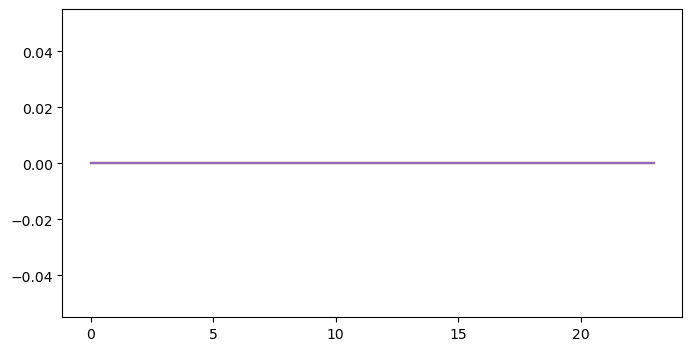

In [20]:
fig, axs = plt.subplots(1, 1, figsize=(8, 4))
diff_may_01 = pH_may_01_al - pH_may_01
diff_may_03 = pH_may_03_al - pH_may_03
diff_may_06 = pH_may_06_al - pH_may_06
diff_may_16 = pH_may_16_al - pH_may_16
diff_may_31 = pH_may_31_al - pH_may_31
axs.plot(diff_may_01)
axs.plot(diff_may_03)
axs.plot(diff_may_06)
axs.plot(diff_may_16)
axs.plot(diff_may_31)
